Assignment
Apply feature selection to the Olivetti faces dataset, identifying the most important 25% of features based on the chi2 criteria. This dataset consists of 10 pictures each of 40 individuals. You can visualize these top selected features on a 64x64 pixel heatmap for visual aid.

Apply tSNE to the digits dataset (transform to 2D) and perform K-means clustering into 10 clusters in 2D space. calculate sklearn.metrics.adjusted_rand_score between the labels obtained in clustering and the original labels. http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

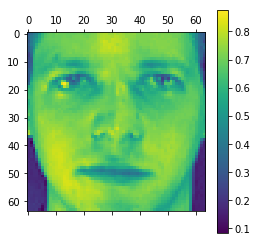

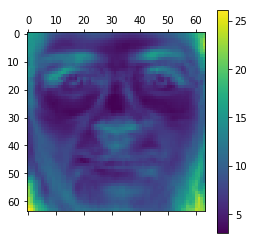

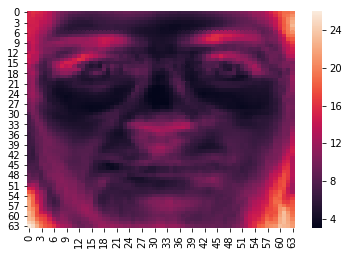

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.datasets
import sklearn.feature_selection

from sklearn.datasets import fetch_olivetti_faces
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

faces = fetch_olivetti_faces()

plt.matshow(faces.data[0].reshape((64,64)))
plt.colorbar()
plt.show()

p75 = SelectPercentile(score_func=chi2, percentile=25)
select = p75.fit_transform(faces.data, faces.target)
reshaped = np.reshape(p75.scores_, (64, 64))

plt.matshow(reshaped)
plt.colorbar()
plt.show()

sns.heatmap(reshaped, cbar=True)
plt.show()

In [64]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

digits = datasets.load_digits()

X = digits.data
y = digits.target
target_names = digits.target_names

In [65]:
def scatterplot_2D(R, title, labels=None):
    """ Helper function to plot data points in 2D
        Requires (N, 2) numpy array shape
    """
    assert(R.shape[1] == 2)
    # class labels are turned into colors
    if labels is None:
        c = 'black'
    else:
        color_scale = np.linspace(0, 1, len(set(labels)))
        c = [plt.cm.Set1(color_scale[i]) for i in labels]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('white')
    ax.scatter(R[...,0], R[...,1], color=c)
    ax.axis('square')
    ax.set_xlabel('R1')
    ax.set_ylabel('R2')
    fig.suptitle(title)
    plt.show()

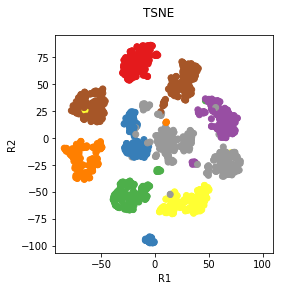

[5 7 7 ..., 7 3 3]
Adj. Rand score 0.668699122363


In [66]:
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import adjusted_rand_score

R_TSNE = TSNE(n_components=2, perplexity=10.0).fit_transform(X)
scatterplot_2D(R_TSNE, 'TSNE', y)
kmeans = sklearn.cluster.KMeans(n_clusters=10, random_state=0).fit(X)
print(kmeans.labels_)
print("Adj. Rand score", adjusted_rand_score(y, kmeans.labels_))

Optional exercise:
Use BRCA gene (protein) expression data provided in this class. Apply K-means clustering to the original expression data and to the result of NMF decomposition with 10 components (H matrix). For simplicity, use k=10 as the number of clusters in K-means. Calculate adjusted_rand_score as a measure of consensus between the two resulting sets of clustering labels.

In [98]:
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler

expression_fname = 'https://dcc.icgc.org/api/v1/download?fn=/release_18/Projects/BRCA-US/protein_expression.BRCA-US.tsv.gz'

E = pd.read_csv(expression_fname, delimiter='\t')

E = E[['icgc_donor_id', 'gene_name', 'antibody_id', 'normalized_expression_level']]

E_mean = E.groupby(['icgc_donor_id','gene_name']).mean()

X = MinMaxScaler().fit_transform(E_mean)

nmf = NMF(n_components=10, random_state=0).fit_transform(X)

Ekmeans = KMeans(n_clusters=10, random_state=0).fit_transform(X)

nmfkmeans = KMeans(n_clusters=10, random_state=0).fit_transform(nmf)

print("Adj. Rand score", adjusted_rand_score(Ekmeans, nmfkmeans))

ValueError: labels_true must be 1D: shape is (34270, 10)